<a href="https://colab.research.google.com/github/sharonsanjana/BREAST-CANCER-DETECTION/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import random

## Data check

In [ ]:
df = pd.read_csv('/content/sample_data/Breast_Cancer_Nipple.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.sample(5).T

,491,179,302,558,443
id,91376702,873586,89263202,925277,909777
diagnosis,B,B,M,B,B
radius_mean,17.85,12.81,20.09,14.59,10.57
texture_mean,13.23,13.06,23.86,22.68,18.32
perimeter_mean,114.6,81.29,134.7,96.39,66.82
area_mean,992.1,508.8,1247.0,657.1,340.9
smoothness_mean,0.07838,0.08739,0.108,0.08473,0.08142
compactness_mean,0.06217,0.03774,0.1838,0.133,0.04462
concavity_mean,0.04445,0.009193,0.2283,0.1029,0.01993
concave points_mean,0.04178,0.0133,0.128,0.03736,0.01111


In [ ]:
df.info()  # clean data !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.duplicated().sum()

0

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


In [ ]:
df.diagnosis.tail(10)

559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64

# Correlations

In [ ]:
correlation_index=df.corrwith(df.diagnosis)

In [ ]:
correlation_index.sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

<Axes: >

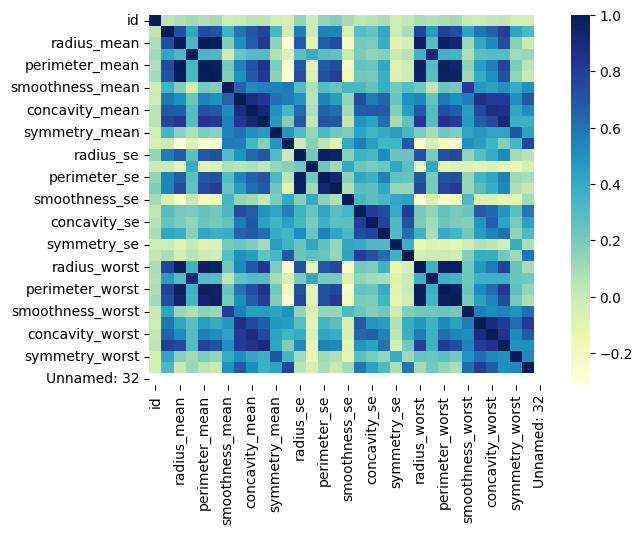

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu')

## Drop invalid columns

In [ ]:
df.drop(columns=["Unnamed: 32","id"], axis=1, inplace=True)

In [ ]:
num_cols = df.columns

In [ ]:
num_cols

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## EDA

IndexError: ignored

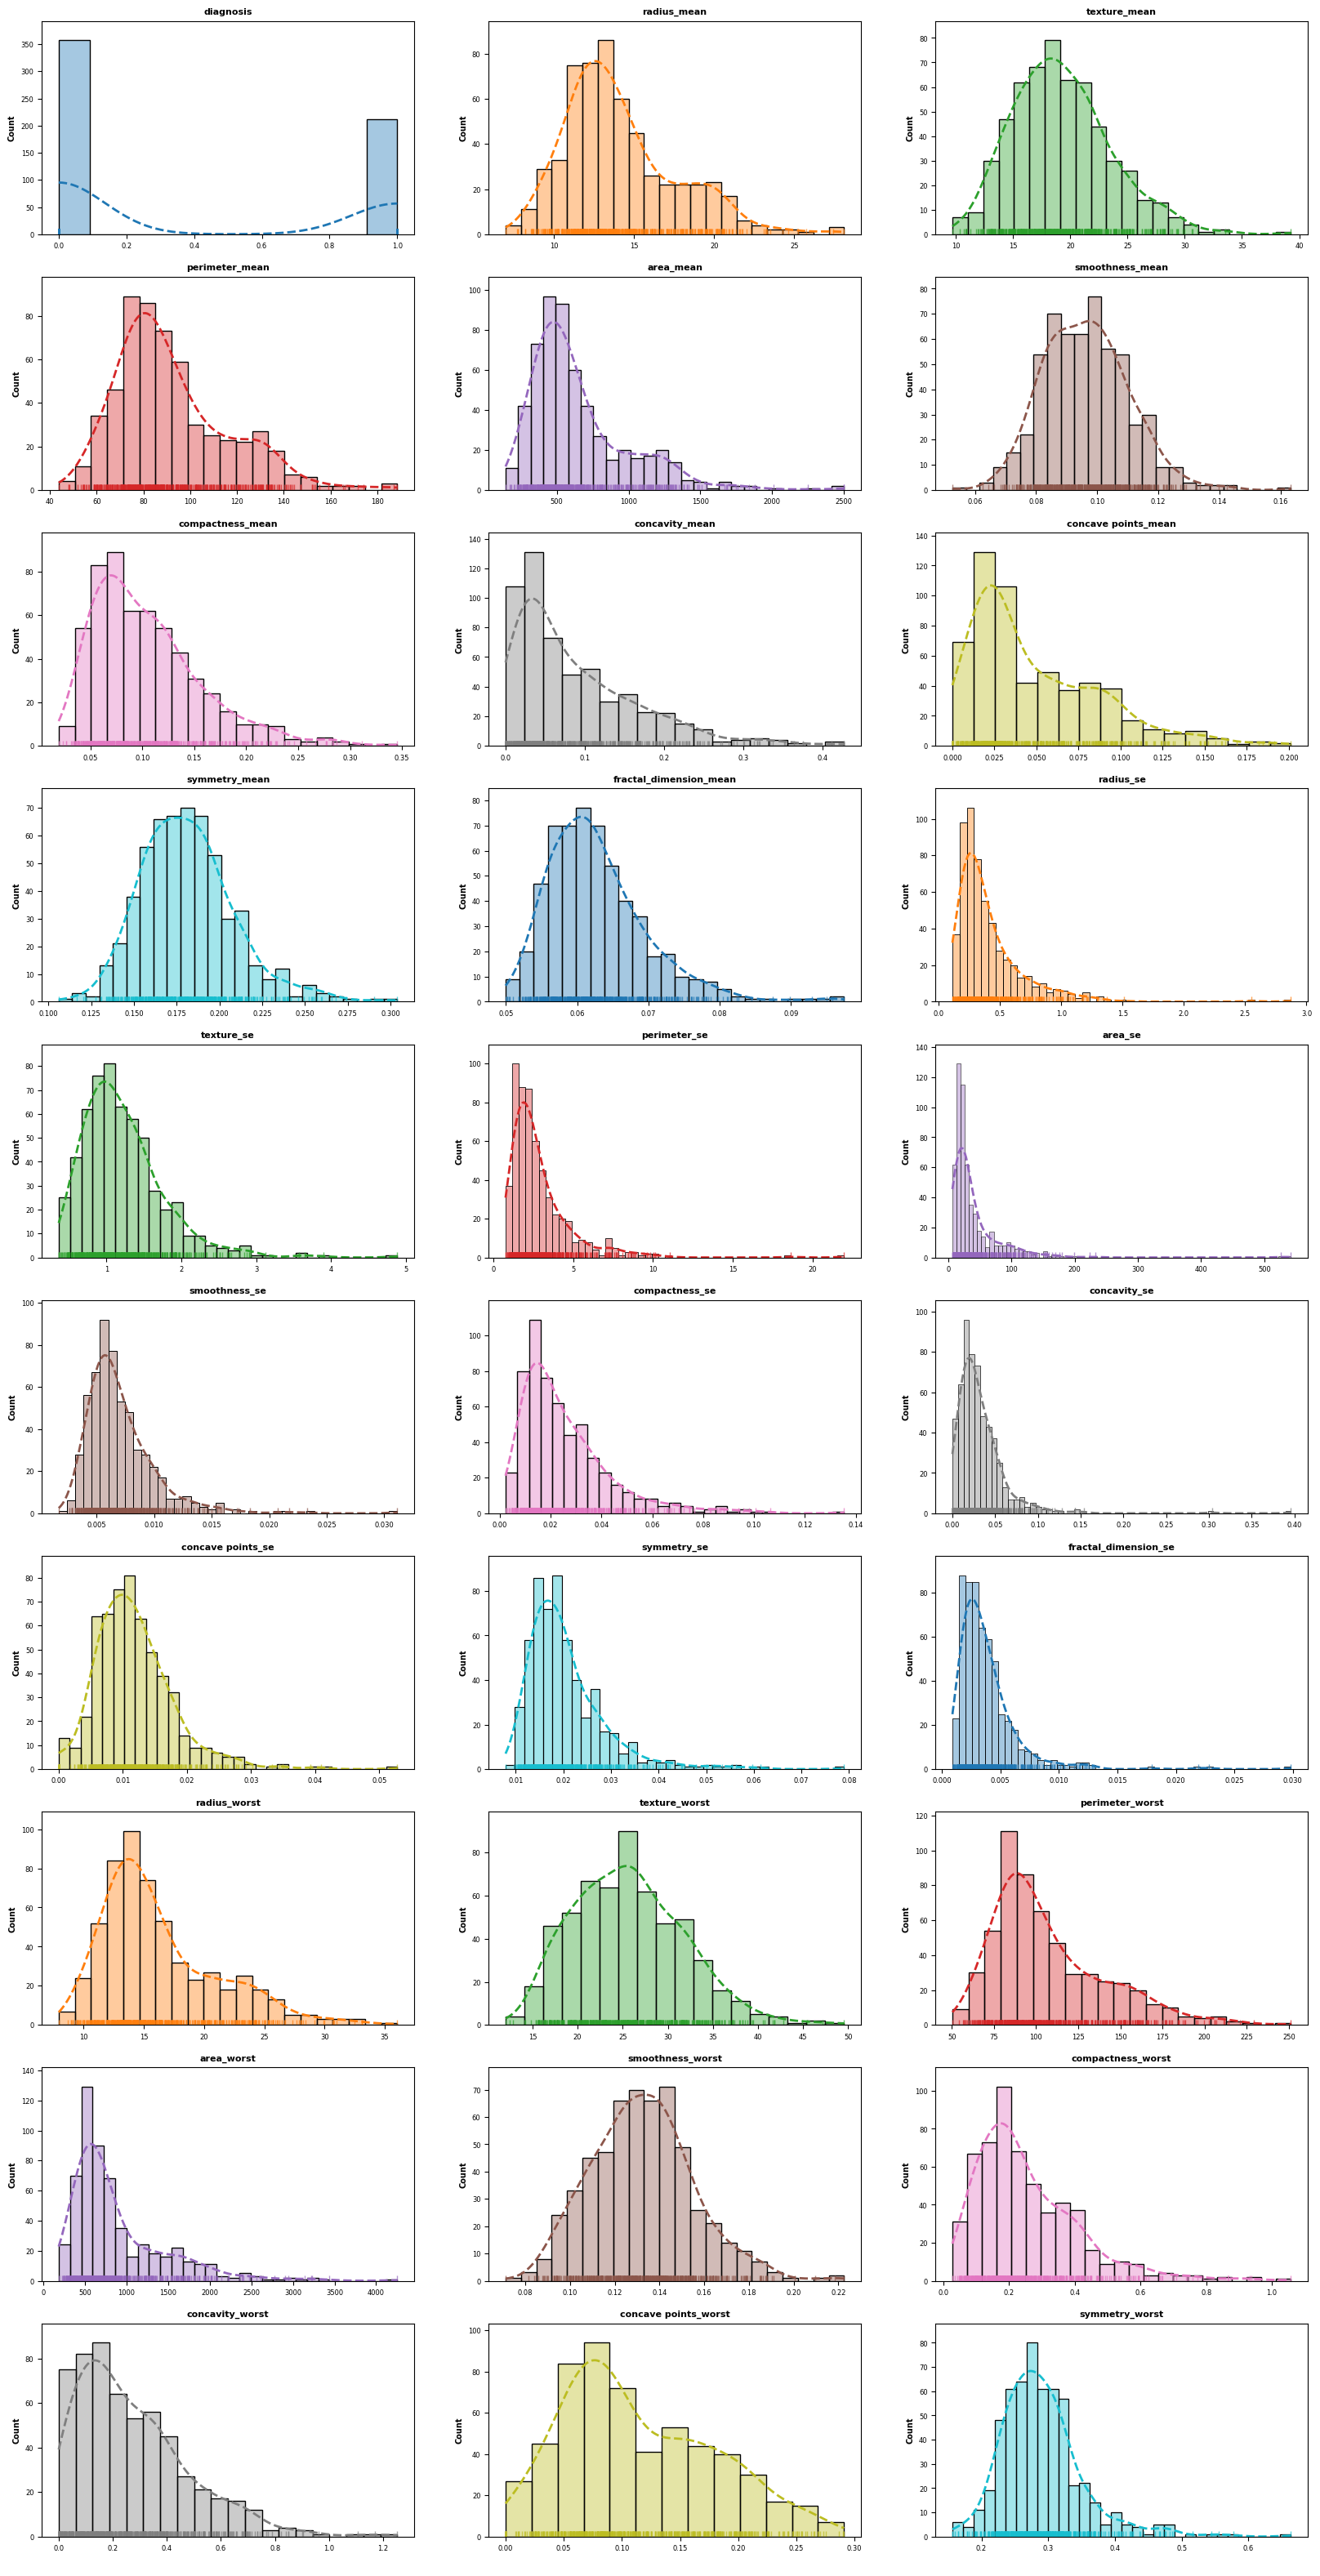

In [ ]:
fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20, 40))
axes = axes.flat
data=df
color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(num_cols):
    sns.histplot(data,
               x = num_col,
               stat = 'count',
               kde = True,
               color = color_cycle[i % num_colors]["color"],
               line_kws = {'linewidth': 2,
                           'linestyle':'dashed'},
               alpha = 0.4,
               ax = axes[i])
    sns.rugplot(data,
              x = num_col,
              color = color_cycle[i % num_colors]["color"],
              ax = axes[i], alpha = 0.7)
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
    axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
    axes[i].tick_params(labelsize = 6)

fig.delaxes(axes[5])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 0.92)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

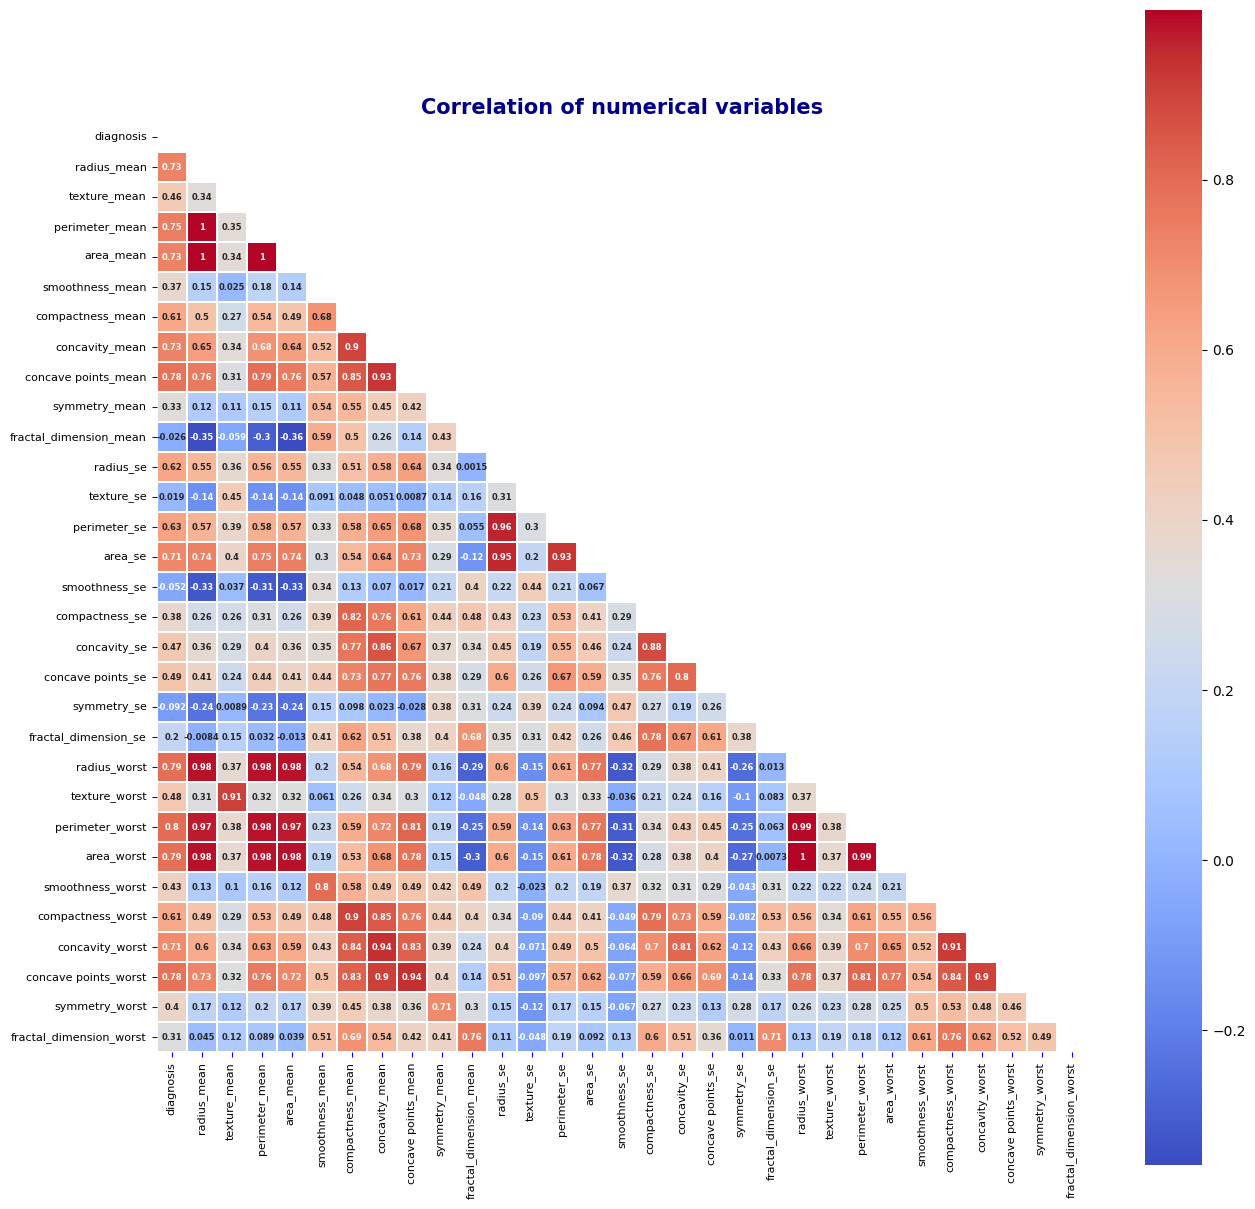

In [ ]:
corr_matrix = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,
            mask = mask,
            square = True,
            annot = True,
            ax = ax,
            linewidths = 0.2,
            annot_kws = {'size':6, 'fontweight':'bold'},
            cmap='coolwarm')
ax.tick_params(labelsize=8, color = 'blue', labelcolor='black')
ax.set_title('Correlation of numerical variables',fontsize = 15,fontweight='bold', color = 'darkblue')
fig.show()

# ML Algorithms

In [ ]:
def plot_metrics(cv_results,model_name):
    metrics = ['accuracy', 'precision','recall', 'f1']

    metrics_train = {'accuracy':round(cv_results['train_accuracy'].mean(), 3),
                'precision':round(cv_results['train_precision'].mean(), 3),
                'recall':round(cv_results['train_recall'].mean(), 3),
                'f1':round(cv_results['train_f1'].mean(), 3)}

    metrics_test = {'accuracy':round(cv_results['test_accuracy'].mean(), 3),
                    'precision':round(cv_results['test_precision'].mean(), 3),
                    'recall':round(cv_results['test_recall'].mean(), 3),
                    'f1':round(cv_results['test_f1'].mean(), 3)}

    df_metrics = pd.DataFrame(index = metrics,
                              data = {'Train':[metrics_train[metric] for metric in metrics],
                                      'Test':[metrics_test[metric] for metric in metrics]})


    n = len(df_metrics.index)
    x = np.arange(n)


    width = 0.25

    fig,ax = plt.subplots(figsize=(6,4))

    rects1 = ax.bar(x-width, df_metrics.Train, width=width, label='Train',linewidth=1.6,edgecolor='black',color='blue')

    rects2 = ax.bar(x, df_metrics.Test, width=width, label='Test',linewidth=1.6, edgecolor='black', color = 'red')

    ax.set_title(f'Metrics of {model_name}',fontsize=12, fontweight='bold')
    ax.set_ylabel('Score',fontsize=10, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(x-0.13)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='bold')
    ax.legend()

    def autolabel(rects):

        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'bold')

    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    fig.show()

In [ ]:
def plot_accuracy(cv_results,model_name):
    fig,axes = plt.subplots()
    axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
    axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
    axes.set_xticks(np.arange(1,6,1))
    axes.set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
    axes.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
    axes.set_title(f'Accuracy of {model_name}', fontsize = 12, fontweight = 'bold', color = 'blue')
    axes.legend()

    fig.tight_layout()
    fig.subplots_adjust(top = 0.9)
    fig.show()

In [ ]:
X=df.drop("diagnosis", axis=1)
y=df.diagnosis

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
skf = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state = 123)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
best_trial_params={'max_depth': 11, 'subsample': 0.6, 'n_estimators': 6200, 'eta': 0.08,
                   'reg_alpha': 1, 'reg_lambda': 21, 'min_child_weight': 12,
                   'colsample_bytree': 0.15507995688972184}

XGB_tuned = XGBClassifier(**best_trial_params)

<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


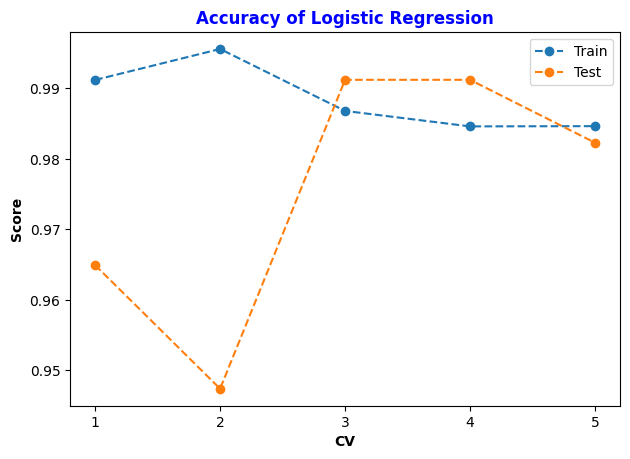

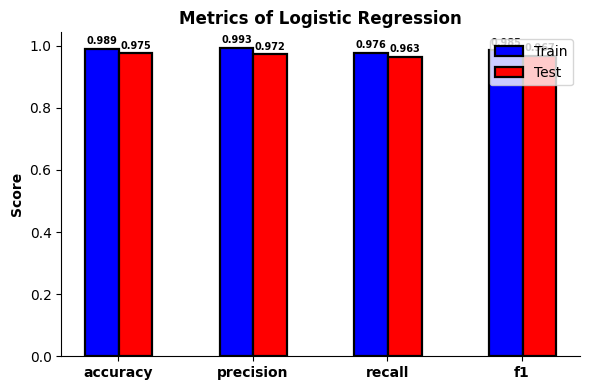

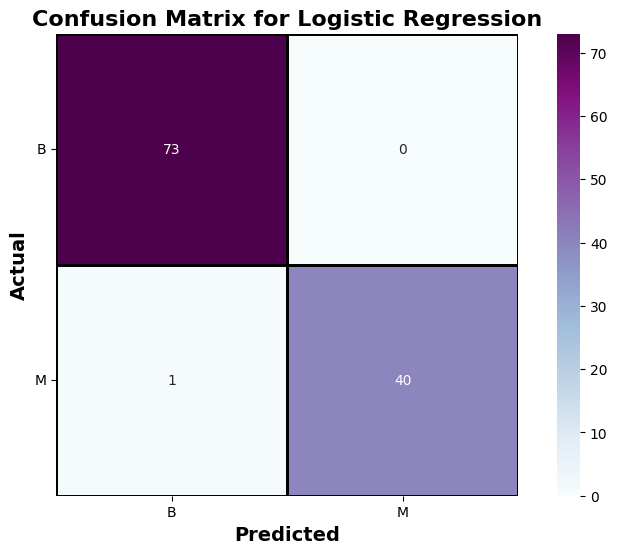

--------------------------------------------------------------------------


<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


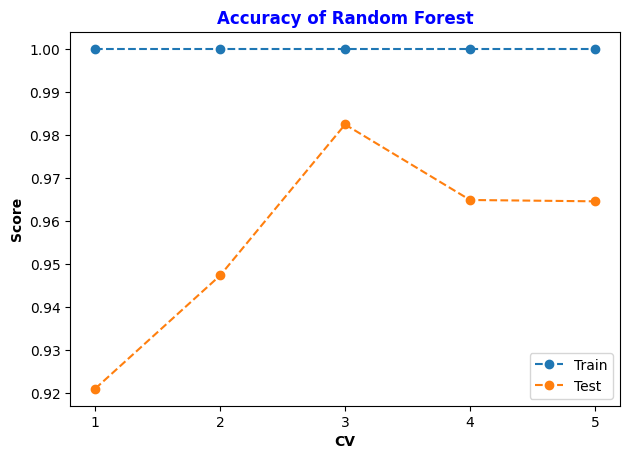

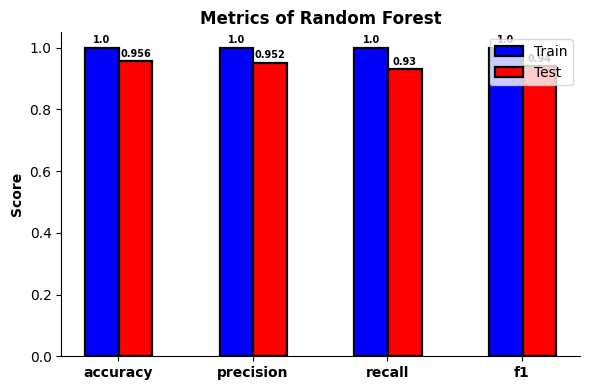

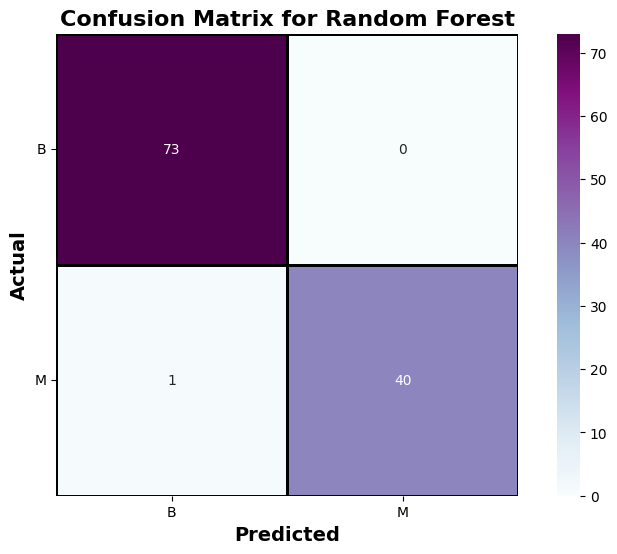

--------------------------------------------------------------------------


<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


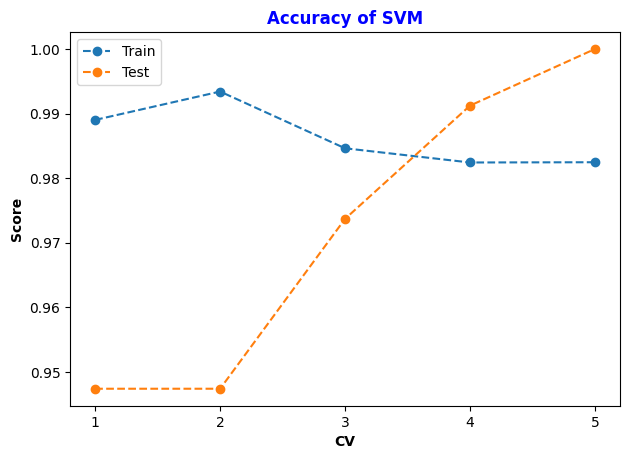

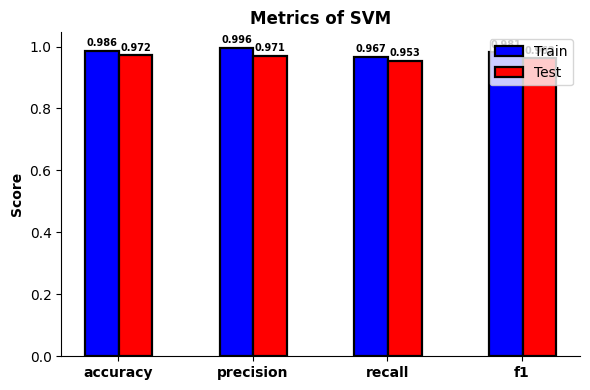

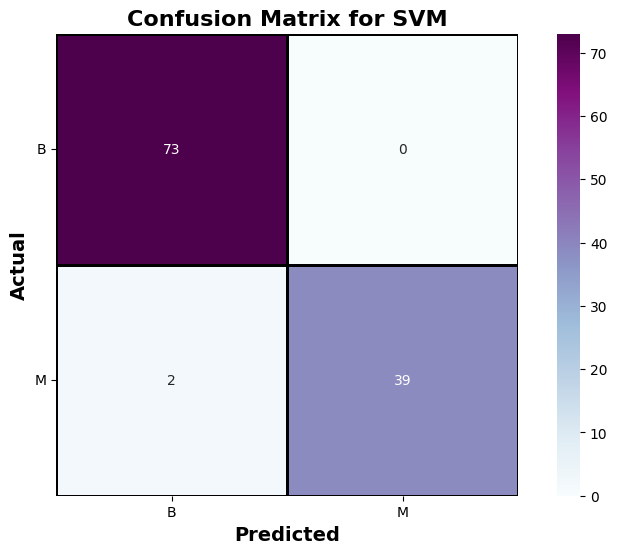

--------------------------------------------------------------------------


<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


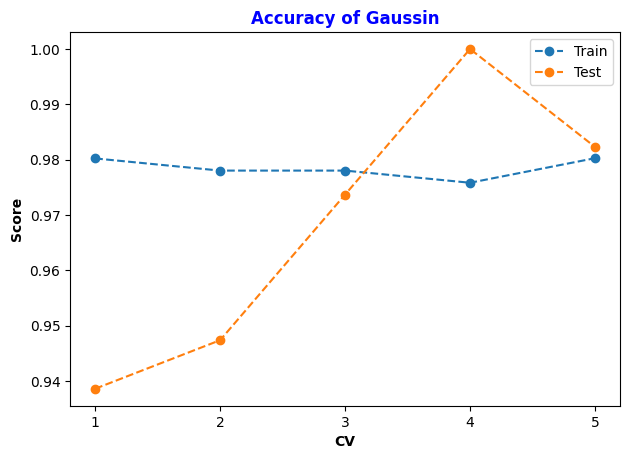

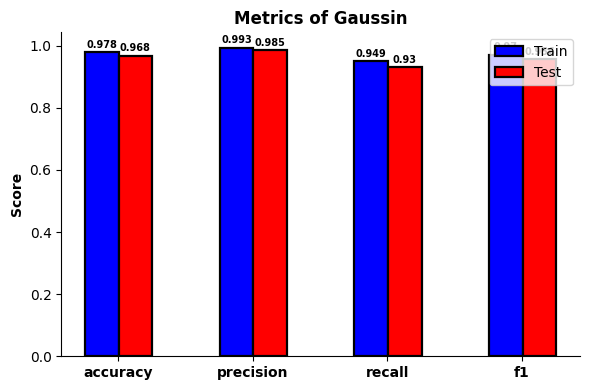

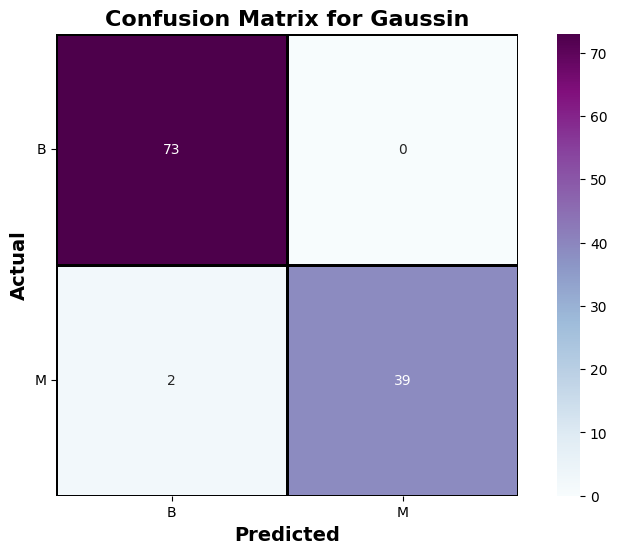

--------------------------------------------------------------------------


<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


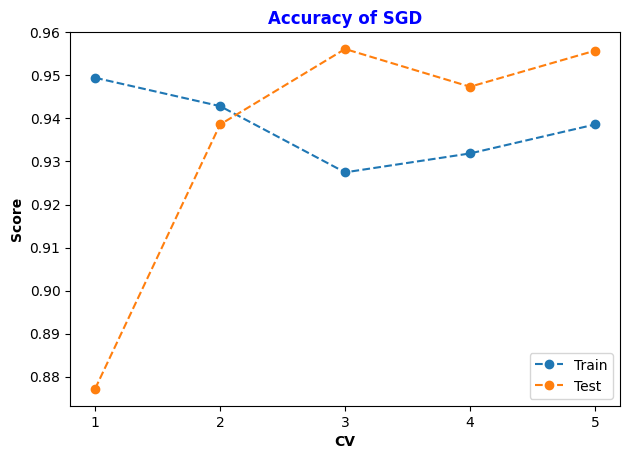

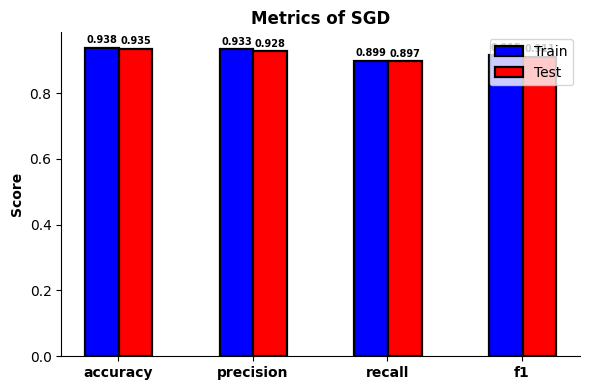

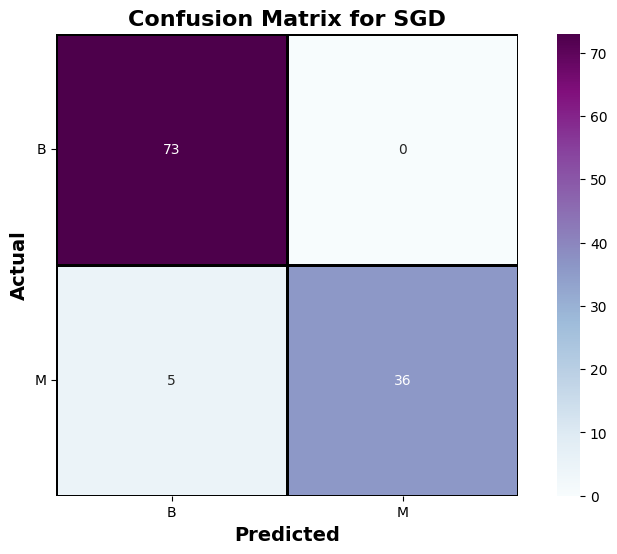

--------------------------------------------------------------------------


<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


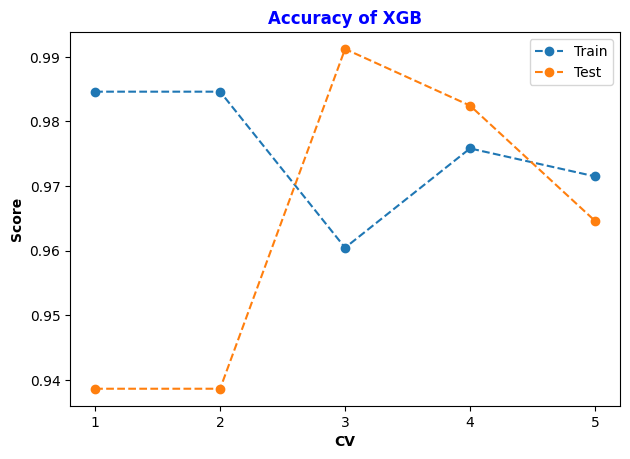

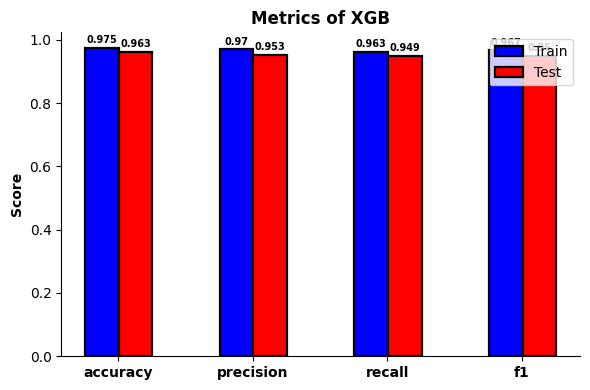

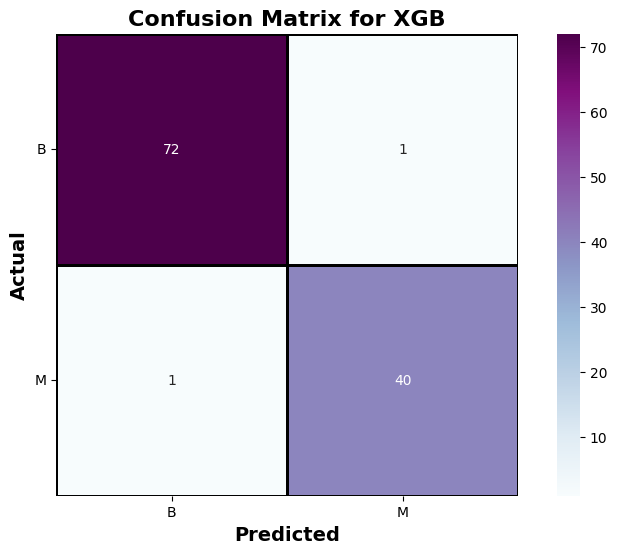

--------------------------------------------------------------------------


<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


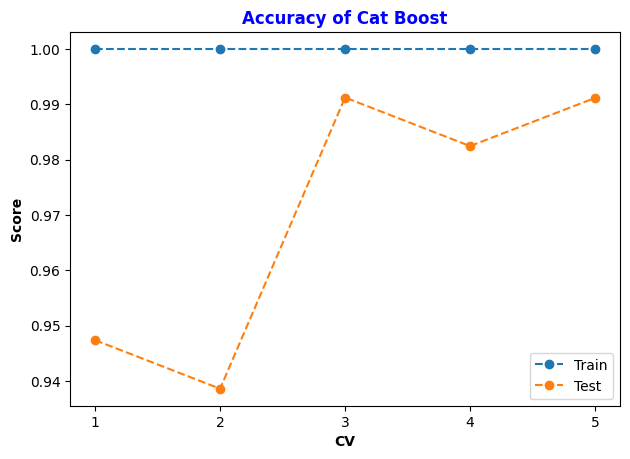

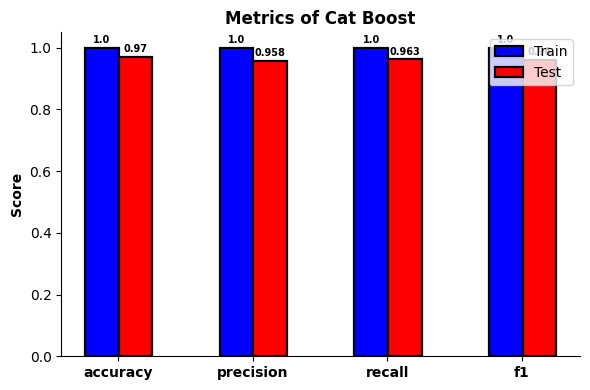

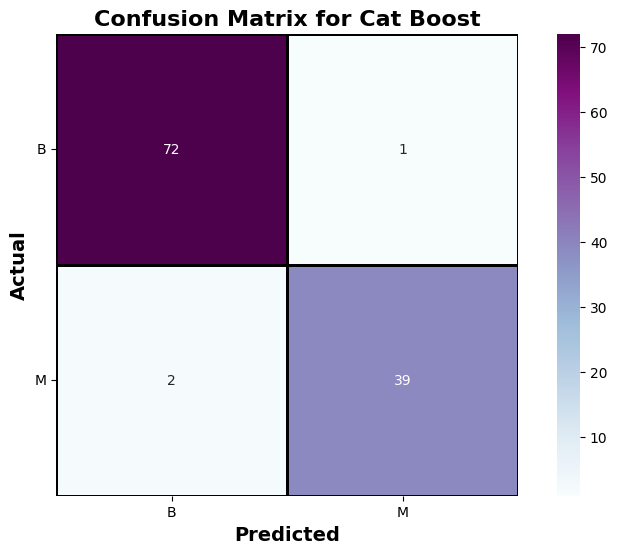

--------------------------------------------------------------------------


<ipython-input-24-b141d26014d7>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
<ipython-input-24-b141d26014d7>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')


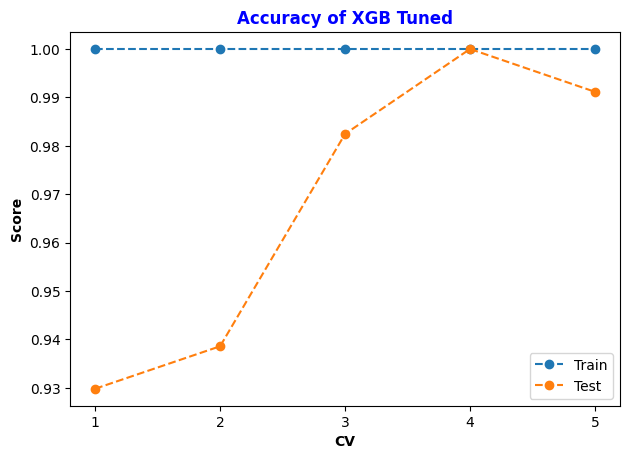

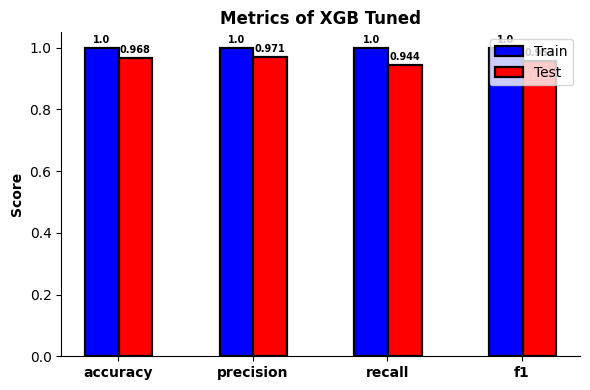

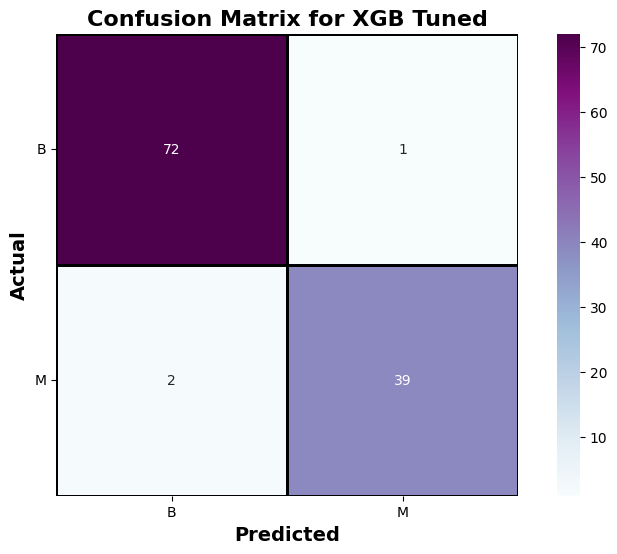

--------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import accuracy_score

models = [LogisticRegression(max_iter=2000) ,RandomForestClassifier(), SVC(),  KNeighborsClassifier(), GaussianNB(), SGDClassifier(),XGBClassifier(), CatBoostClassifier(verbose=False),XGB_tuned]
models_cv_results_train,models_cv_results_test = {},{}
names = ['Logistic Regression','Random Forest','SVM','Gaussin','SGD','XGB','Cat Boost','XGB Tuned']

for model,name in zip(models,names):
    cv_results = cross_validate(estimator = model,
                               X = X,
                               y = y,
                               scoring = ['accuracy', 'precision', 'recall', 'f1'],
                               cv = skf,
                               verbose = 1,
                               return_train_score = True,
                               error_score = 'raise')
    plot_accuracy(cv_results,name)
    plot_metrics(cv_results,name)
    model.fit(X_train,y_train)
    y_predss=model.predict(X_test)
    cm = confusion_matrix(y_test, y_predss)
    plt.figure(figsize=(10, 6))

    sns.heatmap(
        cm, annot=True, fmt='d', cmap='BuPu', linewidths = 2, linecolor = "black", square=True, cbar=True,
        xticklabels=["B", "M"],
        yticklabels=["B", "M"]
    )

    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=14, fontweight='bold')
    plt.title(f'Confusion Matrix for {name}', fontsize=16, fontweight='bold')
    plt.yticks(rotation=360)

    plt.show()
    metrics_train= {'accuracy':round(cv_results['train_accuracy'].mean(), 3),
                'precision':round(cv_results['train_precision'].mean(), 3),
                'recall':round(cv_results['train_recall'].mean(), 3),
                'f1':round(cv_results['train_f1'].mean(), 3)}
    metrics_test= {'accuracy':round(cv_results['test_accuracy'].mean(), 3),
                'precision':round(cv_results['test_precision'].mean(), 3),
                'recall':round(cv_results['test_recall'].mean(), 3),
                'f1':round(cv_results['test_f1'].mean(), 3)}
    models_cv_results_train[name] = metrics_train
    models_cv_results_test[name] = metrics_test
    print("--------------------------------------------------------------------------")

models=[X]

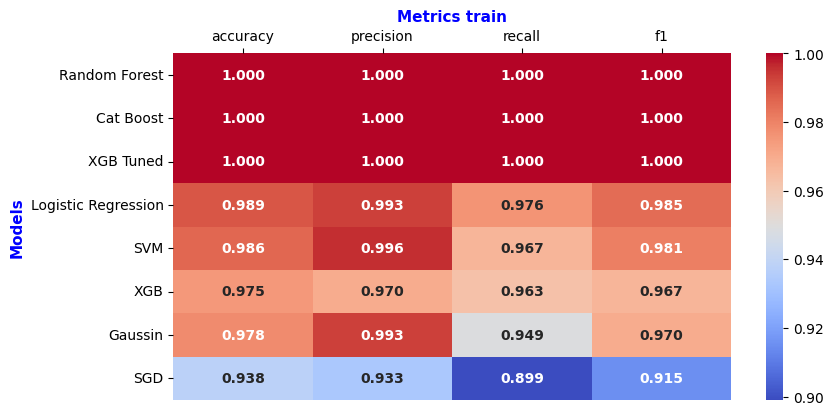

In [ ]:
df_train_metrics = pd.DataFrame.from_dict(models_cv_results_train,orient='index')
# We order from highest to lowest by the f1 score metric, which is the one we chose because we have unbalanced classes.
df_train_metrics = df_train_metrics.sort_values('recall', ascending = False)

# we visualize the training metrics
fig,ax = plt.subplots(figsize=(9,4.5))
sns.heatmap(df_train_metrics, annot=True, cmap = 'coolwarm', annot_kws = {'fontweight':'bold'},fmt = '.3f', ax = ax)
ax.xaxis.tick_top()
ax.set_ylabel('Models', fontsize = 11, fontweight = 'bold', color = 'blue')
ax.set_title('Metrics train', fontsize = 11, fontweight = 'bold', color = 'blue')
fig.show()

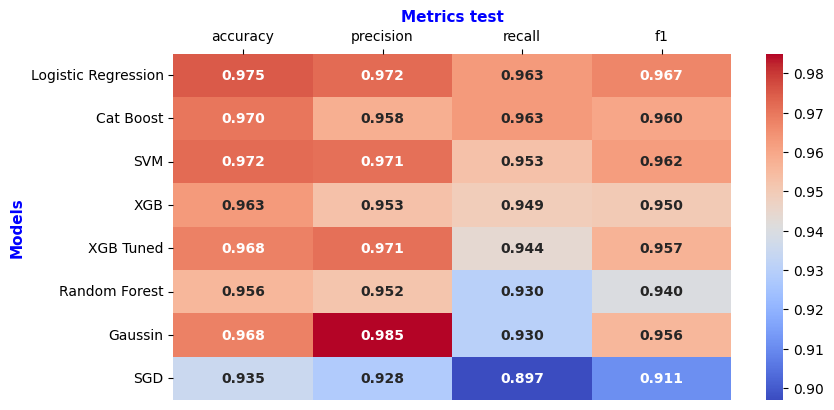

In [ ]:
df_train_metrics = pd.DataFrame.from_dict(models_cv_results_test,orient='index')
# We order from highest to lowest by the f1 score metric, which is the one we chose because we have unbalanced classes.
df_train_metrics = df_train_metrics.sort_values('recall', ascending = False)

# we visualize the training metrics
fig,ax = plt.subplots(figsize=(9,4.5))
sns.heatmap(df_train_metrics, annot=True, cmap = 'coolwarm', annot_kws = {'fontweight':'bold'},fmt = '.3f', ax = ax)
ax.xaxis.tick_top()
ax.set_ylabel('Models', fontsize = 11, fontweight = 'bold', color = 'blue')
ax.set_title('Metrics test', fontsize = 11, fontweight = 'bold', color = 'blue')
fig.show()